In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
#from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [33]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import TCI_Lsite_accumulative_v1 as TCI

importlib.reload(ED)
importlib.reload(TCI)


<module 'TCI_Lsite_accumulative_v1' from '/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1.py'>

In [34]:
# define Hamiltonian terms
L = 11
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']
threshold = 30
D = L


# Model 0 and 2

In [35]:
# Define parameters
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
iterlist = list(range(1, 14))
err2 = {'0': [[] for _ in iterlist], '2': [[] for _ in iterlist]}
errmax = {'0': [[] for _ in iterlist], '2': [[] for _ in iterlist]}
eval = {'0': [[] for _ in iterlist], '2': [[] for _ in iterlist]}

# Generate Hamiltonian
Hlist = [ED.gen_Ham(L = L, model = 0), ED.gen_Ham(L = L, model = 2)]

# Iterate over Hlist
for j, H in enumerate(Hlist): 
    # Iterate over nlist
    for n in nlist:
        print(f"n = {n}")
        # Generate correlator and function values
        Cs = ED.correlator(H= H, L = L, dt = dt/2**(n-8),  n = n)
        func_vals = Cs.T #Cs is in the form (X,T)
        f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]

        # Iterate over iterlist
        for idx, i in enumerate(iterlist):  
            func = TCI.function(f_t)
            _, _, evals, err_2, err_max, _ = TCI.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                            func_vals,    
                                            D,
                                            L=n,          # number of MPS tensors
                                            iters=i)
            
            # Append results
            err2[f'{j*2}'][idx].append(err_2)
            errmax[f'{j*2}'][idx].append(err_max)     
            eval[f'{j*2}'][idx].append(evals)

        #I could do a dictionary for model 0 and model 2

n = 8
Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -1.0828315183228667e-15
err_max:  0.2306228555857352
err_2:  0.23971283525842996

repeated evaluations:  100
unique evaluations 48
unique + repeated:  148
total evaluations:  148

err_max:  0.01628334985407985
err_2:  0.01746742560811456

repeated evaluations:  376
unique evaluations 84
unique + repeated:  460
total evaluations:  460

err_max:  0.0023584331468498847
err_2:  0.0021713204545501896

repeated evaluations:  848
unique evaluations 128
unique + repeated:  976
total evaluations:  976

err_max:  0.0004441027677245174
err_2:  0.00023729192573959792

repeated evaluations:  1528
unique evaluations 160
unique + repeated:  1688
total evaluations:  1688

err_max:  6.586129185369185e-05
err_2:  5.0750068365397e-05

repeated evaluations:  2404
unique evaluations 192
unique + repeated:  2596
total evaluations:  2596

err_max:  3.2486659941067194e-06
err_2:  2.804726909910614e-06

repeated evaluations:  3492
unique evaluations 

In [36]:
print(err2)

{'0': [[0.23971283525842996, 0.24239544551358982, 0.24374400881899572, 0.24442010524857166, 0.24475860717554046], [0.01746742560811456, 0.017716919314883076, 0.017843412707853983, 0.017907099427703063, 0.017939053213636622], [0.0021713204545501896, 0.0022282408451173865, 0.0022571475017211145, 0.0022717133670070114, 0.002279091029526121], [0.00023729192573959792, 0.00023837616428996412, 0.00023892436254454422, 0.0002392001292590906, 0.0002394223631806065], [5.0750068365397e-05, 5.162957425042538e-05, 5.2078189210534554e-05, 5.230483729547846e-05, 5.863519621701159e-05], [2.804726909910614e-06, 2.849507227018479e-06, 2.873588319813691e-06, 2.8860842430411157e-06, 3.3215301737619057e-06], [2.709418428146745e-07, 2.9425226187818923e-07, 2.9691164651504555e-07, 2.983103520480883e-07, 3.1503416801219083e-07], [2.964090512998281e-08, 2.5240133671771473e-08, 2.6281489338108563e-08, 2.796034093977597e-08, 2.7156674203584294e-08], [1.205818645089749e-09, 1.1769366386582558e-09, 1.17780081817802

## Error(#evals) for fixed n

In [37]:
#transpose lists created before s.t. each sublist runs over increasing iterations, and each sublist corresponds to a specific n
err2_transpose = {str(i): [list(col) for col in zip(*err2[str(i)])] for i in [0,2]}
errmax_transpose = {str(i): [list(col) for col in zip(*errmax[str(i)])] for i in [0,2]}
eval_transpose = {str(i): [list(col) for col in zip(*eval[str(i)])] for i in [0,2]}

#could have also used list(zip(*evallist)) but then each sublist is not a list but just a tuple


In [38]:
print(eval['0'])
print(eval_transpose['0'])
print(err2_transpose['0'])

[[48, 56, 64, 72, 80], [84, 102, 120, 138, 156], [128, 160, 192, 224, 256], [160, 210, 260, 310, 360], [192, 264, 336, 408, 480], [224, 322, 420, 518, 616], [256, 384, 512, 640, 768], [256, 414, 576, 738, 900], [256, 440, 640, 840, 1040], [256, 462, 704, 946, 1188], [256, 480, 768, 1056, 1344], [256, 494, 832, 1170, 1508], [256, 504, 896, 1288, 1680]]
[[48, 84, 128, 160, 192, 224, 256, 256, 256, 256, 256, 256, 256], [56, 102, 160, 210, 264, 322, 384, 414, 440, 462, 480, 494, 504], [64, 120, 192, 260, 336, 420, 512, 576, 640, 704, 768, 832, 896], [72, 138, 224, 310, 408, 518, 640, 738, 840, 946, 1056, 1170, 1288], [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188, 1344, 1508, 1680]]
[[0.23971283525842996, 0.01746742560811456, 0.0021713204545501896, 0.00023729192573959792, 5.0750068365397e-05, 2.804726909910614e-06, 2.709418428146745e-07, 2.964090512998281e-08, 1.205818645089749e-09, 2.5487187851685675e-11, 1.5409356072582915e-14, 1.3689154619775626e-14, 1.0873420046233369e-14], [0.2423

Function which could be used to trim eval list in order to keep only different terms, but at the moment we don't actually use it

In [39]:
#function used to trim list1 s.t. all terms are different (by keeping last repeated terms)
#and list2 gets trimmed in the same way, i.e. we keep elements in list 2 that have same indeces of
#elements kept in list1
def trim(list1, list2):
    trimmed_list1 = []
    trimmed_list2 = []
    
    for sublist1, sublist2 in zip(list1, list2):
        # Create a dictionary to store the last occurrence of each element in sublist1
        last_occurrence = {item: idx for idx, item in enumerate(sublist1)}
        
        # Sort the items by their last occurrence index
        unique_items = sorted(last_occurrence.keys(), key=lambda x: last_occurrence[x])
        
        # Trim sublist1 and sublist2 based on the unique items
        trimmed_sublist1 = unique_items
        trimmed_sublist2 = [sublist2[last_occurrence[item]] for item in unique_items]
        
        trimmed_list1.append(trimmed_sublist1)
        trimmed_list2.append(trimmed_sublist2)
    
    return trimmed_list1, trimmed_list2

#test to see if code works correctly
eval_transpose_trimmed, err2_transpose_trimmed = trim(eval_transpose['0'], err2_transpose['0'])
print(eval_transpose_trimmed)
print(err2_transpose_trimmed)

[[48, 84, 128, 160, 192, 224, 256], [56, 102, 160, 210, 264, 322, 384, 414, 440, 462, 480, 494, 504], [64, 120, 192, 260, 336, 420, 512, 576, 640, 704, 768, 832, 896], [72, 138, 224, 310, 408, 518, 640, 738, 840, 946, 1056, 1170, 1288], [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188, 1344, 1508, 1680]]
[[0.23971283525842996, 0.01746742560811456, 0.0021713204545501896, 0.00023729192573959792, 5.0750068365397e-05, 2.804726909910614e-06, 1.0873420046233369e-14], [0.24239544551358982, 0.017716919314883076, 0.0022282408451173865, 0.00023837616428996412, 5.162957425042538e-05, 2.849507227018479e-06, 2.9425226187818923e-07, 2.5240133671771473e-08, 1.1769366386582558e-09, 2.689586984519978e-11, 2.3353353468584815e-14, 2.0561405612213513e-14, 2.0312525172917727e-14], [0.24374400881899572, 0.017843412707853983, 0.0022571475017211145, 0.00023892436254454422, 5.2078189210534554e-05, 2.873588319813691e-06, 2.9691164651504555e-07, 2.6281489338108563e-08, 1.1778008181780281e-09, 2.771240090643319

### Plot of err2(#evals) for both models

0
1
2
3
4


<Figure size 640x480 with 0 Axes>

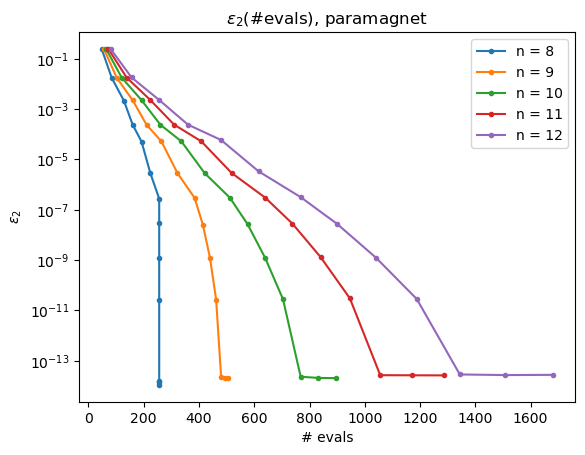

<Figure size 640x480 with 0 Axes>

In [42]:
for idx, i in enumerate(nlist):
    print(idx)
    plt.plot(eval_transpose['0'][idx], err2_transpose['0'][idx], '.-', label = f'n = {i}')
plt.xlabel('# evals')
plt.ylabel(r'$\epsilon_2$')
plt.title(r'$\epsilon_2$(#evals), paramagnet')
plt.yscale('log')
plt.legend()
plt.figure()   

0
1
2
3
4


<Figure size 640x480 with 0 Axes>

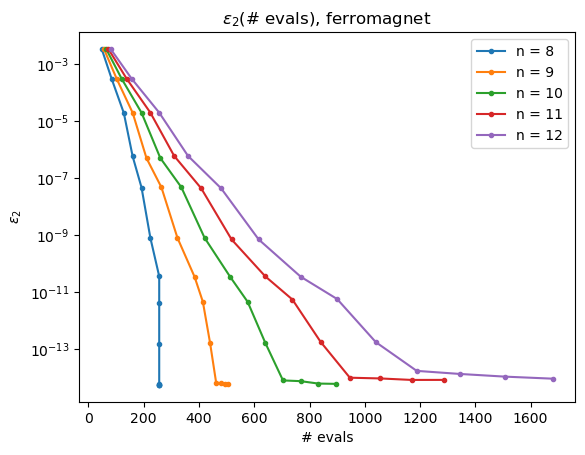

<Figure size 640x480 with 0 Axes>

In [43]:
for idx, i in enumerate(nlist):
    print(idx)
    plt.plot(eval_transpose['2'][idx], err2_transpose['2'][idx], '.-', label = f'n = {i}')
plt.xlabel('# evals')
plt.ylabel(r'$\epsilon_2$')
plt.title(r'$\epsilon_2$(# evals), ferromagnet')
plt.yscale('log')
plt.legend()
plt.figure()

0
1
2
3
4


<Figure size 640x480 with 0 Axes>

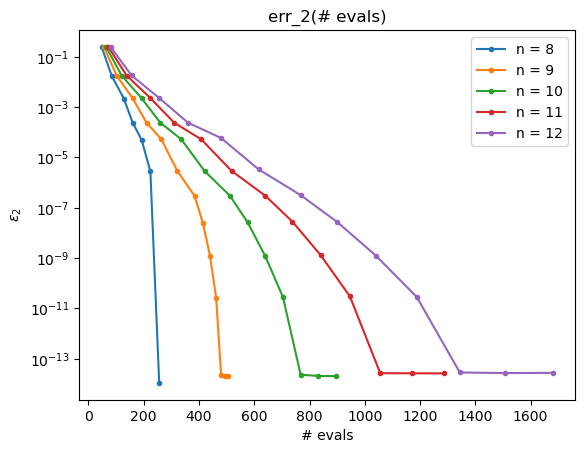

<Figure size 640x480 with 0 Axes>

In [44]:
#same plot as before for model 0, but with trimmed list (no errors with same # of evals)
for idx, i in enumerate(nlist):
    print(idx)
    plt.plot(eval_transpose_trimmed[idx], err2_transpose_trimmed[idx], '.-', label = f'n = {i}')
plt.xlabel('# evals')
plt.ylabel(r'$\epsilon_2$')
plt.title('err_2(# evals)')
plt.yscale('log')
plt.legend()
plt.figure()   

#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])


### Now we fit those graphs
We take 6 points excluding the first 2.

Our aim is to find the exponent $\alpha$ s.t. $err(N = fixed, evals) \approx e^{- \alpha(N) evals} $ so that then we can estimate #evals to have err = err*, N = N*

To fit this, we cannot directly fit the exponential because the x values (# evals) are too big! (order of 200), i.e. the e^-200 are all zero and thus it is impossible for the machine to guess the parameters. The right way to do it is by considering ln(y):
Starting from 

$y = k e^{-\alpha x}$

Taking the natural logarithm of both sides:

$ln(y) = \ln(k) - \ln(\alpha) x$

which can be rewritten as:
$ \tilde{y} = A - Bx $

Actually, we place A = 0 since we actually want the parameter to just be in the exponent

[0.05527182]
[0.03897508]
[0.03004488]
[0.02442211]
[0.02043598]


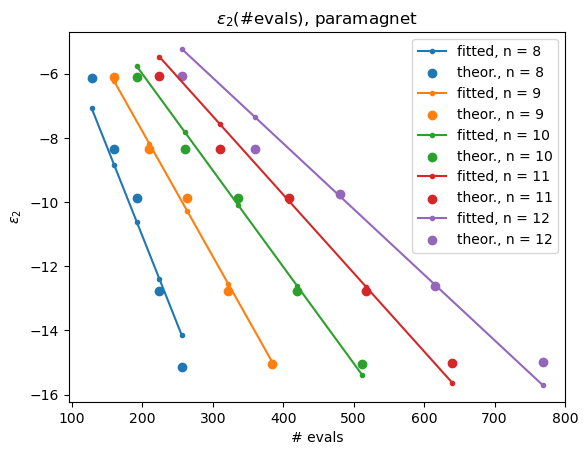

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '$\\alpha(n)$ fitted from the previous plot')

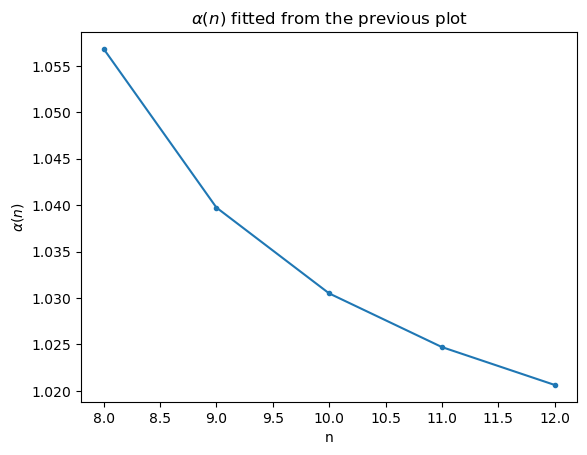

In [90]:
from scipy.optimize import curve_fit

#DOES NOT WORK LIKE IT SHOULD!
# b_list = []
# y_fit_list = []


# def exp_func(x, A, B):
#     return A*np.exp(-B*x)

# # print(exp_func(0,1,1))
# # print(exp_func(-1,1,1))

# for i in range(len(nlist)):
#     x_data = np.array(eval_transpose['0'][i][2:7], dtype=float)
#     y_data = np.array(err2_transpose['0'][i][2:7], dtype=float)
#     params, covariance = curve_fit(exp_func, x_data, y_data)
#     #print(eval_transpose['0'][i][2:7])
#     # Extract fitted parameters
#     a_fit, b_fit = params
#     print(params)
#     b_list.append(b_fit)
#     # Generate fitted y values
#     y_fit = exp_func(x_data, a_fit, b_fit)
#     y_fit_list.append(y_fit)
#     plt.plot(x_data, y_fit)
#     plt.plot(x_data, y_data, '.-', label = f'n = {i}')

# plt.xlabel('# evals')
# plt.ylabel(r'$\epsilon_2$')
# plt.title(r'$\epsilon_2$(#evals), paramagnet')
# plt.yscale('log')
# plt.legend()
# plt.figure()   

# a_list = []
alpha_para_list = []
y_fit_list = []


def linear_func(x,
            #A,
            B):
    return - B*x

# print(exp_func(0,1,1))
# print(exp_func(-1,1,1))

for i,idx in enumerate(nlist):
    x_data = np.array(eval_transpose['0'][i][2:7], dtype=float)
    y_data = np.log(err2_transpose['0'][i][2:7])
    params, covariance = curve_fit(linear_func, x_data, y_data)
    #print(eval_transpose['0'][i][2:7])
    # a_fit, b_fit = params
    print(params)
    alpha_para_list.append(np.exp(params))
    # a_list.append(a_fit)
    # b_list.append(b_fit)

    # y_fit = linear_func(x_data, a_fit, b_fit)
    y_fit = linear_func(x_data, params)
    y_fit_list.append(y_fit)
    plt.plot(x_data, y_fit, '.-', label = f'fitted, n = {idx}')
    plt.scatter(x_data, y_data, label = f'theor., n = {idx}')

plt.xlabel('# evals')
plt.ylabel(r'$\epsilon_2$')
plt.title(r'$\epsilon_2$(#evals), paramagnet')
plt.legend()
plt.figure()    
plt.show()

plt.plot(nlist, alpha_para_list, '.-')
plt.xlabel('n')
plt.ylabel(r'$\alpha(n)$')
plt.title(r'$\alpha(n)$ fitted from the previous plot')

[0.09152124]
[0.06469442]
[0.04981399]
[0.04052816]
[0.03412702]


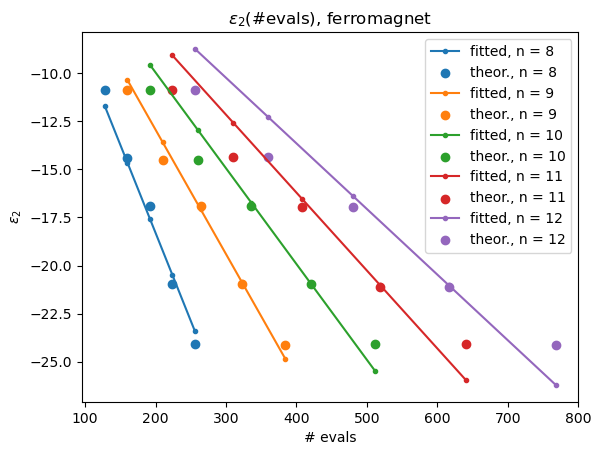

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, '$\\alpha(n)$ fitted from the previous plot')

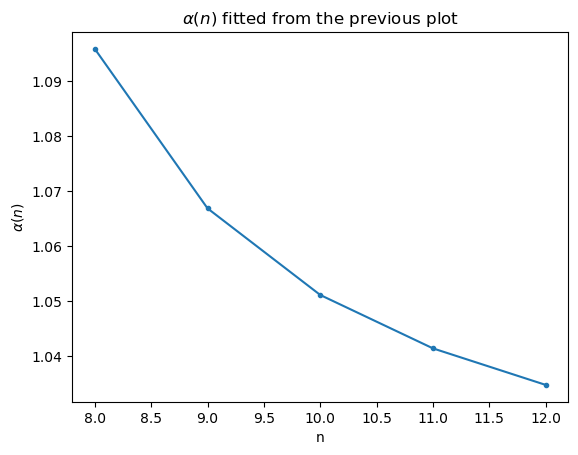

In [91]:
alpha_ferro_list = []
y_fit_list = []


def linear_func(x,
            #A,
            B):
    return - B*x

# print(exp_func(0,1,1))
# print(exp_func(-1,1,1))

for i,idx in enumerate(nlist):
    x_data = np.array(eval_transpose['2'][i][2:7], dtype=float)
    y_data = np.log(err2_transpose['2'][i][2:7])
    params, covariance = curve_fit(linear_func, x_data, y_data)
    #print(eval_transpose['0'][i][2:7])
    # a_fit, b_fit = params
    print(params)
    alpha_ferro_list.append(np.exp(params))
    # a_list.append(a_fit)
    # b_list.append(b_fit)

    # y_fit = linear_func(x_data, a_fit, b_fit)
    y_fit = linear_func(x_data, params)
    y_fit_list.append(y_fit)
    plt.plot(x_data, y_fit, '.-', label = f'fitted, n = {idx}')
    plt.scatter(x_data, y_data, label = f'theor., n = {idx}')

plt.xlabel('# evals')
plt.ylabel(r'$\epsilon_2$')
plt.title(r'$\epsilon_2$(#evals), ferromagnet')
plt.legend()
plt.figure()    
plt.show()

plt.plot(nlist, alpha_ferro_list, '.-')
plt.xlabel('n')
plt.ylabel(r'$\alpha(n)$')
plt.title(r'$\alpha(n)$ fitted from the previous plot')

Text(0.5, 1.0, '$\\alpha(n)$ in 2 cases')

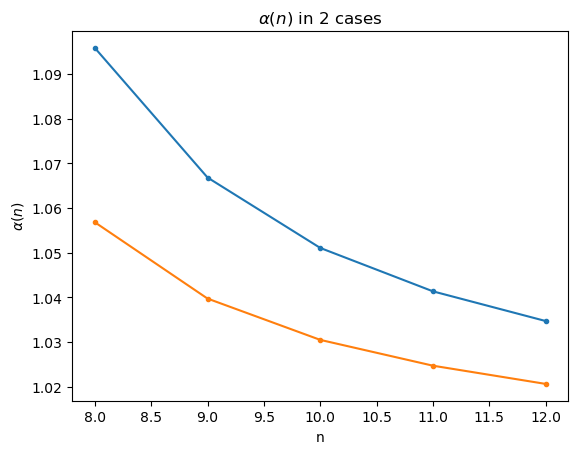

In [93]:
plt.plot(nlist, alpha_ferro_list, '.-')
plt.plot(nlist, alpha_para_list, '.-')
plt.xlabel('n')
plt.ylabel(r'$\alpha(n)$')
plt.title(r'$\alpha(n)$ in 2 cases')

## Error vs N at fixed number of evaluations (not the same as fixed iterations!)

Here we create a function that permits us to pick close # of evals for different n, in order to really plot errors vs N at almost constant evaluations

In [22]:
#given a list of sublists as input:
# we create list by picking one number from each sublist such that the numbers
# are as close to each other as possible.
from itertools import product

# Example input
lists = [
    [48, 84, 128, 160, 192, 224, 256, 256, 256, 256],
    [56, 102, 160, 210, 264, 322, 384, 414, 440, 462],
    [64, 120, 192, 260, 336, 420, 512, 576, 640, 704],
    [72, 138, 224, 310, 408, 518, 640, 738, 840, 946],
    [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188]
]

# Function to find the best set of numbers
def find_closest_set(lists, otherlist, n = 1):
    # Start with the first list
    best_set = []
    for i, lst in enumerate(lists):
        if i == 0:
            # Initialize with the first list
            best_set = [[num] for num in lst]
        else:
            # Update the best set by comparing with the next list
            new_best_set = []
            for current_set in best_set:
                for num in lst:
                    new_set = current_set + [num]
                    new_best_set.append(new_set)
            # Sort by the maximum difference in each set
            new_best_set.sort(key=lambda x: max(x) - min(x))
            # Keep only the best sets
            best_set = new_best_set[:len(lst)]
    # Return the best set with the smallest difference
    #return min(best_set, key=lambda x: max(x) - min(x))

    #Return the top n sets with smallest difference
    best_set.sort(key=lambda x: max(x) - min(x))
    return best_set[:n]


# Find the best set
best_set = find_closest_set(lists)
print("Best set of numbers:", best_set)

TypeError: find_closest_set() missing 1 required positional argument: 'otherlist'

This function is a now a generalization of the previous one and this one not only picks close evals for each n, but also creates a list of the errors corresponding to the evals picked, s.t. we can actually do the plot err(N)

In [23]:
#GENERALIZATION: actual correct function

# Function to find the top N best sets of numbers and their corresponding sublists
def find_top_n_closest_sets_with_indices(lists1, lists2, n=3):
    # Start with the first list
    best_set = []
    indices_set = []  # To track the indices of selected elements
    for i, lst in enumerate(lists1):
        if i == 0:
            # Initialize with the first list
            best_set = [[num] for num in lst]
            indices_set = [[idx] for idx in range(len(lst))]
        else:
            # Update the best set by comparing with the next list
            new_best_set = []
            new_indices_set = []
            for current_set, current_indices in zip(best_set, indices_set):
                for idx, num in enumerate(lst):
                    new_set = current_set + [num]
                    new_indices = current_indices + [idx]
                    new_best_set.append(new_set)
                    new_indices_set.append(new_indices)
            # Sort by the maximum difference in each set
            new_best_set, new_indices_set = zip(
                *sorted(zip(new_best_set, new_indices_set), key=lambda x: max(x[0]) - min(x[0]))
            )
            # Keep only the best sets
            best_set = list(new_best_set[:len(lst)])
            indices_set = list(new_indices_set[:len(lst)])
    # Sort the final best_set by the maximum difference
    best_set, indices_set = zip(
        *sorted(zip(best_set, indices_set), key=lambda x: max(x[0]) - min(x[0]))
    )
    # Return the top N sets with the smallest difference
    best_set = list(best_set[:n])
    indices_set = list(indices_set[:n])

    # Use the indices to extract corresponding sublists from lists2
    corresponding_sublists = []
    for indices in indices_set:
        corresponding_sublists.append([lists2[i][idx] for i, idx in enumerate(indices)])

    return best_set, corresponding_sublists


# Example input
lists1 = [
    [48, 84, 128, 160, 192, 224, 256, 256, 256, 256],
    [56, 102, 160, 210, 264, 322, 384, 414, 440, 462],
    [64, 120, 192, 260, 336, 420, 512, 576, 640, 704],
    [72, 138, 224, 310, 408, 518, 640, 738, 840, 946],
    [80, 156, 256, 360, 480, 616, 768, 900, 1040, 1188]
]

lists2 = [
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
    [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
]

# Find the top 3 best sets and their corresponding sublists
top_3_sets, corresponding_sublists = find_top_n_closest_sets_with_indices(lists1, lists2, n=3)

print("Top 3 best sets of numbers:", top_3_sets)
print("Corresponding sublists from the second list:", corresponding_sublists)

Top 3 best sets of numbers: [[48, 56, 64, 72, 80], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256]]
Corresponding sublists from the second list: [[1, 11, 21, 31, 41], [7, 15, 24, 33, 43], [8, 15, 24, 33, 43]]


In [24]:
#Here we define the lists of closest evals, and list of errors corresponding to those evals
best_eval = {}
best_err2 = {}
for i in [0,2]:
    best_eval[str(i)], best_err2[str(i)] = find_top_n_closest_sets_with_indices(eval_transpose[str(i)], err2_transpose[str(i)], n = 10)

In [25]:
print(best_eval)
print()
print(best_err2)

{'0': [[48, 56, 64, 72, 80], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [84, 102, 120, 72, 80], [128, 102, 120, 138, 156]], '2': [[48, 56, 64, 72, 80], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [256, 264, 260, 224, 256], [84, 102, 120, 72, 80], [128, 102, 120, 138, 156]]}

{'0': [[0.2397128352583964, 0.24239544551362266, 0.2437440088189978, 0.24442010524857152, 0.24475860717552764], [2.709418412111997e-07, 5.162957425650024e-05, 0.00023892436254339638, 0.002271713367006241, 0.002279091029525977], [2.964090408525619e-08, 5.162957425650024e-05, 0.00023892436254339638, 0.002271713367006241, 0.002279091029525977], [1.2058179846982721e-09, 5.162957425650024e-05, 0.00023892436254339638, 0.002271713367006241, 0.002279091029525977],

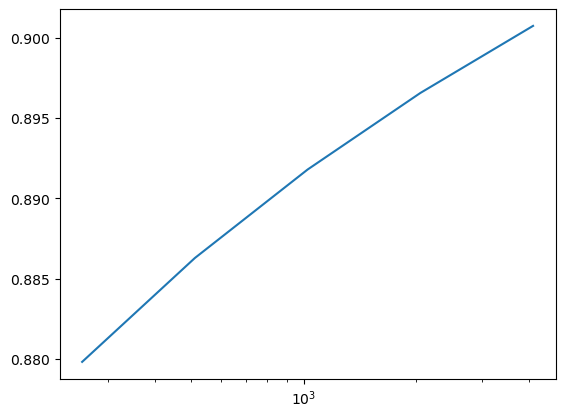

In [13]:
def exp_func(N, A, D):
    return A*np.exp(-1/np.sqrt(D*np.log(N)))


plt.plot(Nlist, [exp_func(N, 1, D) for N in Nlist])
plt.xscale('log')

### Plot Model 0

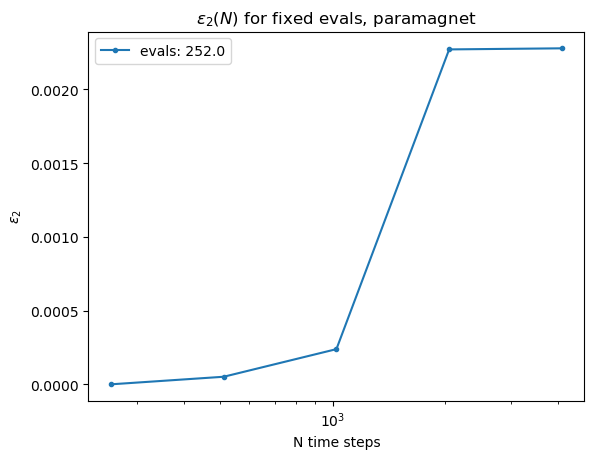

In [26]:
plt.plot(Nlist, best_err2['0'][1], '.-', label = f'evals: {np.average(best_eval['0'][1])}')
plt.xlabel('N time steps')
plt.ylabel(r'$\epsilon_2$')
plt.xscale('log')
plt.title(r'$\epsilon_2(N)$ for fixed evals, paramagnet')
plt.legend()

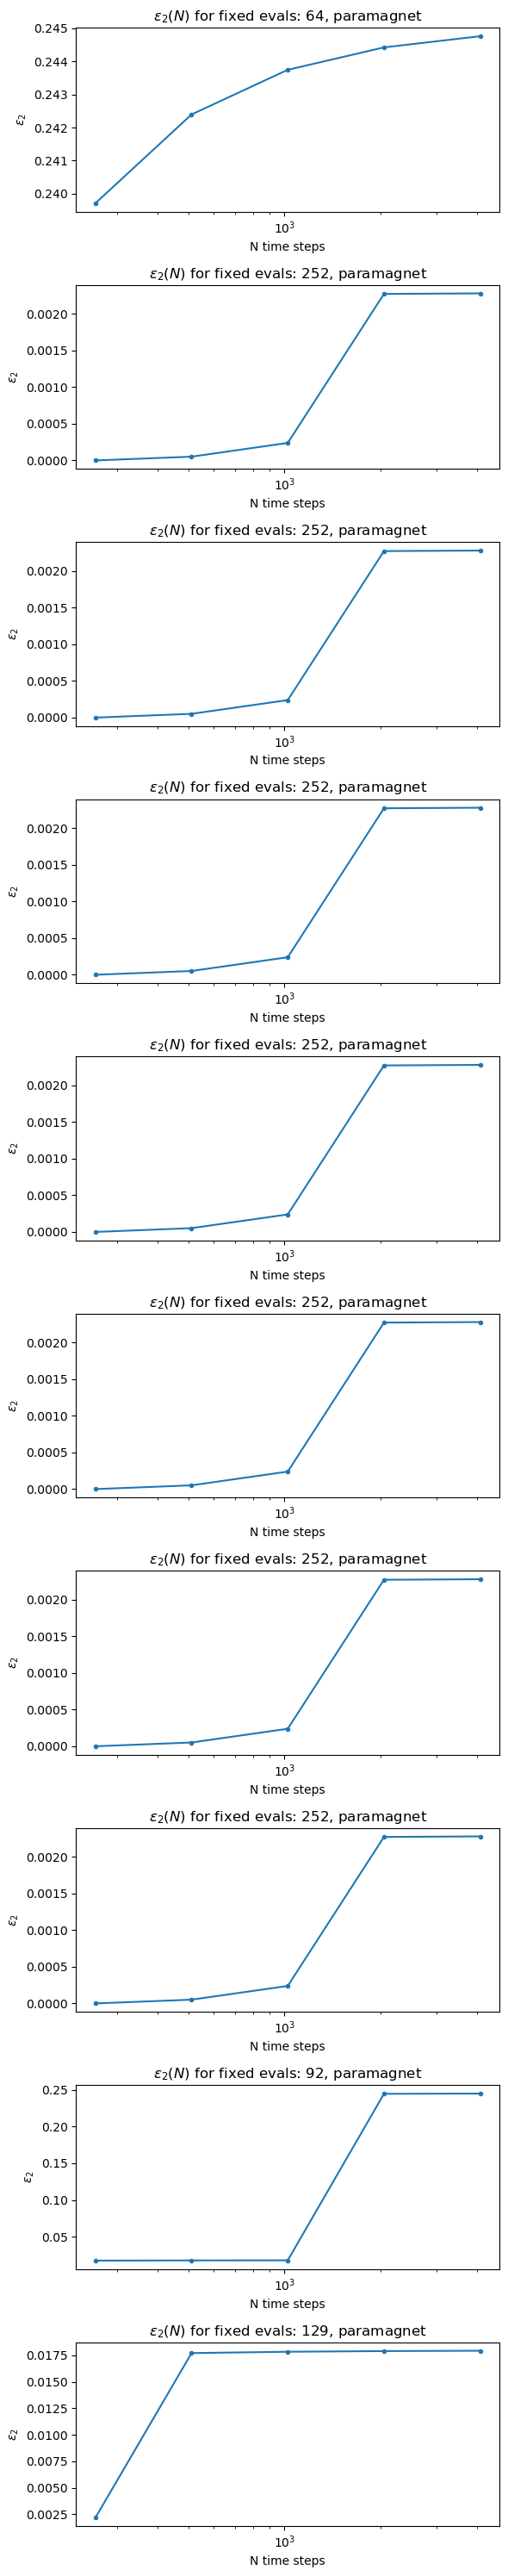

In [27]:
fig, ax = plt.subplots(len(best_err2['0']), 1, figsize = (6, 3*len(best_err2['0'])))

for idx, i in enumerate(best_err2['0']):
    ax[idx].plot(Nlist, i, '.-')
    ax[idx].set(xlabel = 'N time steps', ylabel = r'$\epsilon_2$')
    ax[idx].set(xscale = 'log')
    ax[idx].set_title(r'$\epsilon_2(N)$ for fixed evals: ' + f'{np.average(best_eval['0'][idx]):.0f}' + ', paramagnet')

fig.tight_layout()

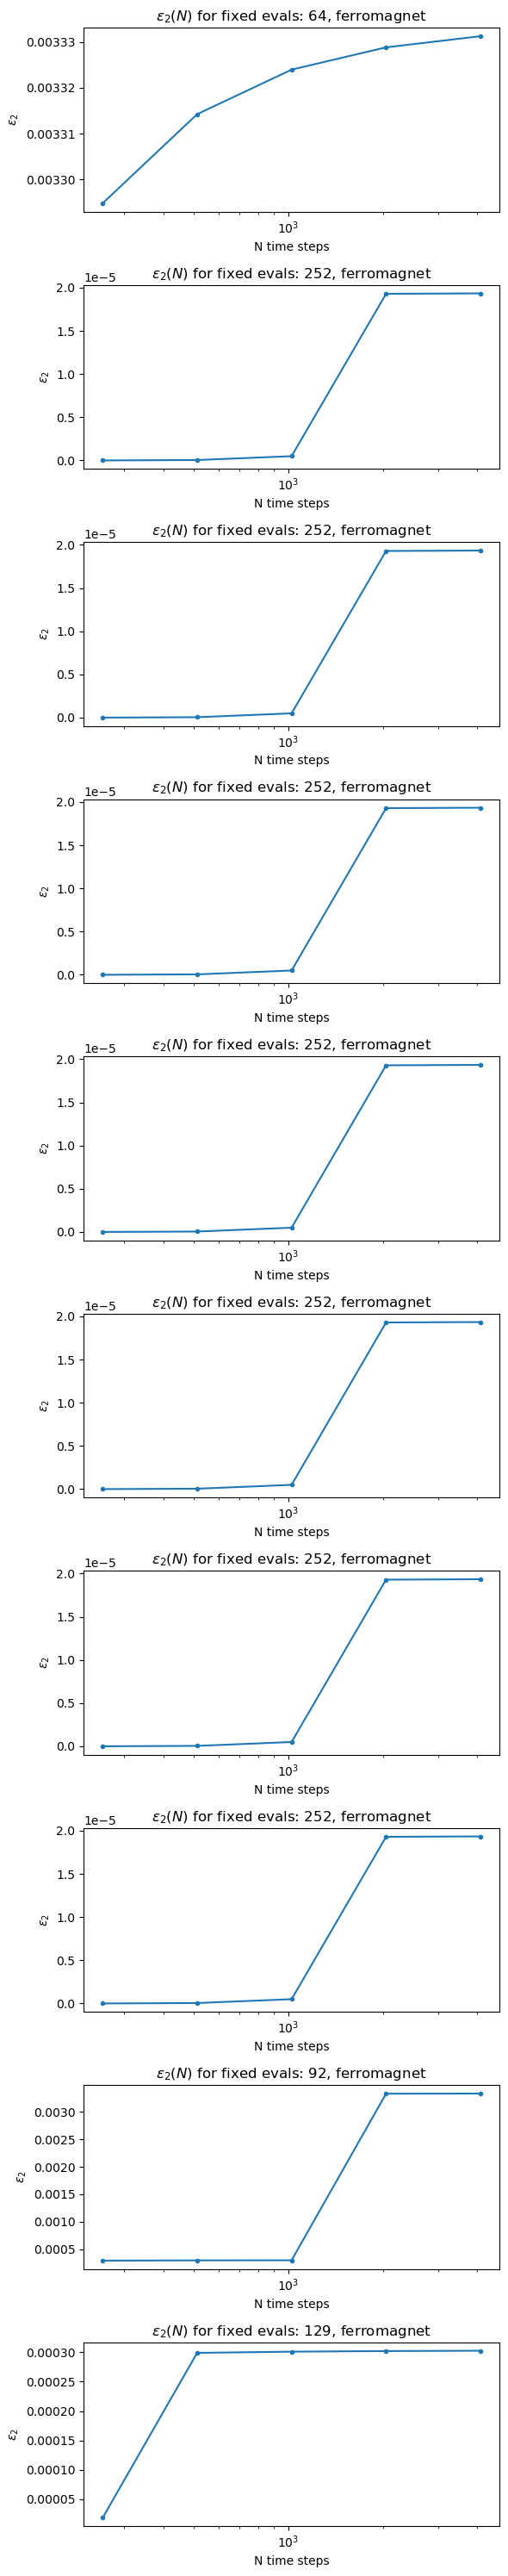

In [28]:
fig, ax = plt.subplots(len(best_err2['2']), 1, figsize = (6, 3*len(best_err2['2'])))

for idx, i in enumerate(best_err2['2']):
    ax[idx].plot(Nlist, i, '.-')
    ax[idx].set(xlabel = 'N time steps', ylabel = r'$\epsilon_2$')
    ax[idx].set(xscale = 'log')
    ax[idx].set_title(r'$\epsilon_2(N)$ for fixed evals: ' + f'{np.average(best_eval['2'][idx]):.0f}' + ', ferromagnet')

fig.tight_layout()

### # of evals(N) at fixed error! (run until err < err_threshold)

In [54]:
import TCI_Lsite_accumulative_v1_err_threshold as TCI_err

importlib.reload(TCI_err)


<module 'TCI_Lsite_accumulative_v1_err_threshold' from '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI/TCI_Lsite_accumulative_v1_err_threshold.py'>

In [55]:
errlist = [10**(-i) for i in range(1,10,1)]
print(errlist)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]


### Check how well algorithm works: 
i.e. how close the convergence error of the algorithm is w.r.t. threshold

In [19]:
n = 11
N = 2**n
H = ED.gen_Ham(L = L, model = 0)
Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
func_vals = Cs.T #Cs is in the form (X,T)
f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
for err in errlist:
    print("err ", err)
    func = TCI_err.function(f_t)
    evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                            func_vals,    
                            D,
                            L=n,          # number of MPS tensors
                            threshold = err) 
    print()

Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  9.573162956119857e-17
err  0.1
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.01
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.001
err_max:  0.0012661466326375967
err_2:  0.0007516265896868334
unique evaluations 408

err  0.0001
err_max:  0.00010062851489873927
err_2:  4.2754600809619453e-05
unique evaluations 1056

err  1e-05
err_max:  8.57993418765467e-06
err_2:  4.190775837469242e-06
unique evaluations 1288

err  1e-06
err_max:  7.244543410415088e-07
err_2:  2.654983763457423e-07
unique evaluations 1536

err  1e-07
err_max:  2.745913693112128e-07
err_2:  8.330687596481178e-08
unique evaluations 1598

err  1e-08
err_max:  1.6545964032741564e-09
err_2:  9.582271913989963e-10
unique evaluations 1710

err  1e-09
err_max:  1.6545964032741564e-09
err_2:  9.582271913989963e-10
unique evaluations 1710



In [58]:
nlist = np.arange(8,13,1)
Nlist = [2**n for n in nlist]
errlist = [10**(-i) for i in range(2,8,1)]
evalsdict = {str(i): [[] for _ in errlist] for i in [0,2]}


Hlist = [ED.gen_Ham(L = L, model = 0), ED.gen_Ham(L = L, model = 2)]

for j, H in enumerate(Hlist):
    for n in nlist:
        Cs = ED.correlator(H= H, L = L, dt = dt/2**(n-8),  n = n)
        func_vals = Cs.T #Cs is in the form (X,T)
        f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
        for idx, err in enumerate(errlist):
            print("err ", err)
            func = TCI_err.function(f_t)
            evals, error, err_max= TCI_err.accumulative_tensor_cross_interpolation(func,         # function to be interpolated
                                    func_vals,    
                                    D,
                                    L=n,          # number of MPS tensors
                                    threshold = err) 
            evalsdict[str(j*2)][idx].append(evals)
        


Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -1.838938541879164e-15
err  0.01
err_max:  0.0023584331468399582
err_2:  0.002171320454549202
unique evaluations 128
err  0.001
err_max:  0.00044410276773172063
err_2:  0.0002372919257441024
unique evaluations 160
err  0.0001
err_max:  6.586129185854083e-05
err_2:  5.075006836773313e-05
unique evaluations 192
err  1e-05
err_max:  3.2486659908026997e-06
err_2:  2.8047269109389686e-06
unique evaluations 224
err  1e-06
err_max:  4.891307078700732e-07
err_2:  2.7094184142609735e-07
unique evaluations 256
err  1e-07
err_max:  5.5998178910699874e-08
err_2:  2.9640905891034267e-08
unique evaluations 256
Expectation value $\bra{\psi_0} X_{L/2} \ket{psi_0}$=  -1.3667531495134618e-16
err  0.01
err_max:  0.0024134818557184825
err_2:  0.0022282408451206786
unique evaluations 160
err  0.001
err_max:  0.0004442537350131832
err_2:  0.00023837616429671046
unique evaluations 210
err  0.0001
err_max:  6.679836734861312e-05
err_2:  5.1629574254317956

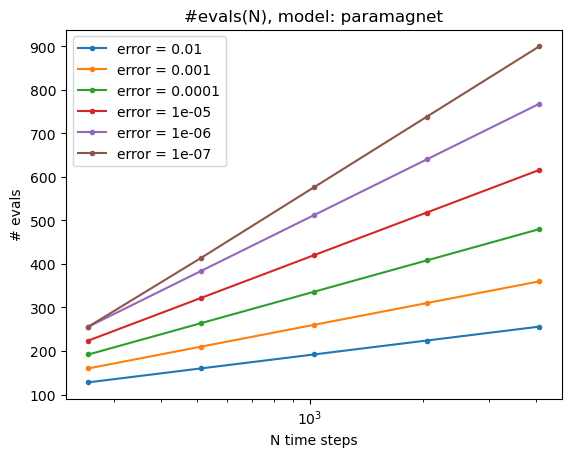

In [62]:
for idx, i in enumerate(errlist):
    plt.plot(Nlist, evalsdict['0'][idx], '.-', label = f'error = {i}')
plt.xlabel('N time steps')
plt.ylabel('# evals')
plt.xscale('log')
plt.title('#evals(N), model: paramagnet')
plt.legend()
#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])


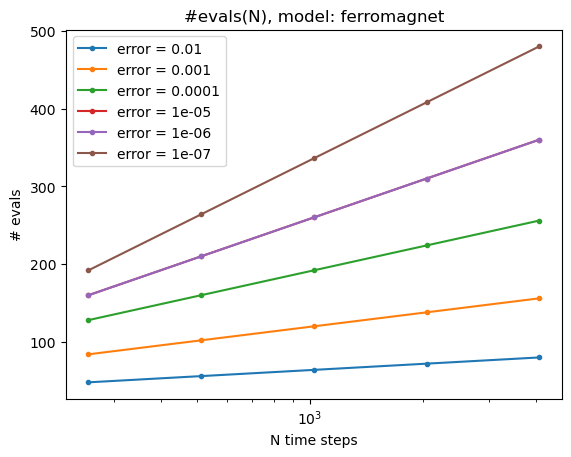

In [71]:
for idx, i in enumerate(errlist):
    plt.plot(Nlist, evalsdict['2'][idx], '.-', label = f'error = {i}')
plt.xlabel('N time steps')
plt.ylabel('# evals')
plt.xscale('log')
plt.title('#evals(N), model: ferromagnet')
plt.legend()
#plt.plot(Nlist, [exp_func(N,11,6.9, 1) for N in Nlist])

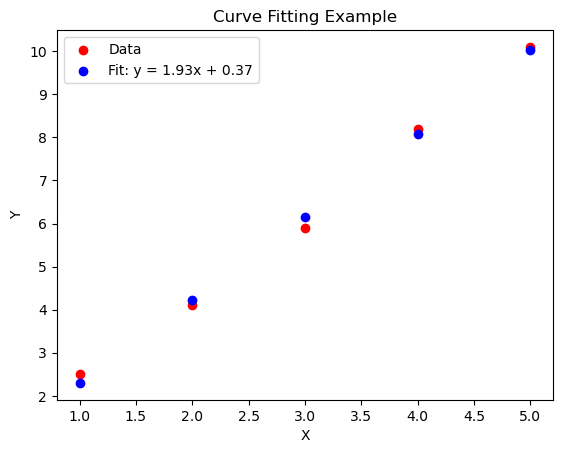

In [63]:
#to fit a function

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample Data (Replace with your actual data)
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2.5, 4.1, 5.9, 8.2, 10.1])

# Define the function to fit
def my_function(x, a, b):
    return a * x + b  # Example: Linear function y = ax + b

# Fit the curve
params, covariance = curve_fit(my_function, x_data, y_data)

# Extract fitted parameters
a_fit, b_fit = params

# Generate fitted y values
#x_fit = np.linspace(min(x_data), max(x_data), 100)  # Smooth curve
y_fit = my_function(x_data, a_fit, b_fit)

# Plot data and fitted curve
plt.scatter(x_data, y_data, label="Data", color="red")
plt.scatter(x_data, y_fit, label=f"Fit: y = {a_fit:.2f}x + {b_fit:.2f}", color="blue")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Curve Fitting Example")
plt.show()
